# K fold cross validation 
 Needed because train/test split method gives a very high variance testing accuracy depending on the observations in test/train sets. 
 


In [1]:
from sklearn.cross_validation import KFold

In [9]:
kf = KFold(25, n_folds = 5, shuffle=True)

In [10]:
print('{} {:^61} {}'.format('Iteration', 'Training set observations','Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations
    1     [ 0  2  3  4  5  6  7  8  9 10 13 15 16 17 18 19 21 22 23 24] [ 1 11 12 14 20]
    2     [ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 22] [ 0  9 21 23 24]
    3     [ 0  1  2  4  5  7  8  9 10 11 12 13 14 17 18 19 20 21 23 24] [ 3  6 15 16 22]
    4     [ 0  1  2  3  5  6  9 10 11 12 13 14 15 16 18 20 21 22 23 24] [ 4  7  8 17 19]
    5     [ 0  1  3  4  6  7  8  9 11 12 14 15 16 17 19 20 21 22 23 24] [ 2  5 10 13 18]


## Comparison of train/test split and Cross validation

1. Cross validation gives better accuracy and uses data efficiently.

2. train/test is much faster than k fold cross validation.

## Recommendations for Cross Validation.

1. Use k = 10 (Proven to give most accurate results)
2. Stratified sampling: For classification problems use stratified sampling that means each response class should be represented with equal proportions in each folds.  """ Scikit learns cross_val_score function does this by default. 

# Cross validation: Parameter tuning

In [11]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [20]:
# 10 fold cross validation for knn n=5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,x,y, cv=10, scoring='accuracy' )
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [22]:
print(scores.mean())

0.966666666667


## Search for an optimal value of k in knn

In [23]:
k_range = range(1,31)

In [24]:
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x,y, cv=10, scoring='accuracy' )
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


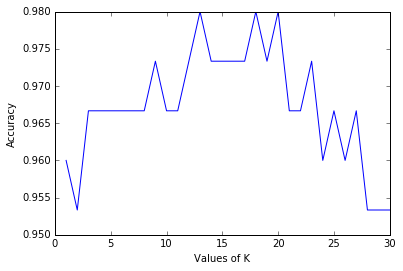

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the value of k (knn) versus the cross validation accuracy 
plt.plot(k_range,k_scores)
plt.xlabel("Values of K")
plt.ylabel("Accuracy")

### Downward shaping bell curve

### Just for easy understanding bias and variance can be considered analogous to Accuracy and Precision respectively.

#### Bias: How far predictions are from actual value.  
#### Accuracy: How far a measured value from true value.

#### Variance: How different are model predictions compared to each other. 
#### Precision: How separated are different observations from each other. 


### Bias:Variance::Accuracy:Precision

### Bias and Variance trade off in the curve, at low values of k there is high variance but low bias, at high values of k there is low variance but high bias, best value of K occurs when the sum of bias and variance is minimum i.e. in the middle of bell curve. 

# Key pointers:

1. K directly proportional to bias
2. K inversely proportional to variance.
3. Complexity inversely proportional to |[slope(bias)]|
4. Complexity proportional to |slope(Variance)|

Excellent reference on bias-Variance tradeoff: http://scott.fortmann-roe.com/docs/BiasVariance.html 







# In case of knn higher values of k give simpler model, so we choose around 20.














# Cross validation: Model Selection

In [29]:
# 10 fold cross validation with the best knn model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,x,y, cv=10, scoring='accuracy' ).mean())

0.98


In [30]:
# 10 fold cross validation with logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, x, y, cv=10, scoring='accuracy').mean())

0.953333333333


 # Cross validation: Feature selection

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [32]:
# Read in the advertisement dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [33]:
# Create a python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']
x = data[feature_cols]
y = data.Sales

In [34]:
lm = LinearRegression()
scores = cross_val_score(lm, x, y, cv=10, scoring = 'mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [35]:
# Fix the sign of mse scores
mse_scores = -scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [36]:
# rmses 
rmse = (np.sqrt(mse_scores)).mean()
print(rmse)

1.69135317081


In [42]:
# 10 fold cross validation for model with only tv and radio as features
feats = ['TV', 'Radio']
X = data[feats]
print((np.sqrt(-cross_val_score(lm, X, y, cv =10, scoring = 'mean_squared_error'))).mean())

1.67967484191


In [43]:
# Since rmse of model excluding newspaper is less it's a better model. 

# Improvements to Cross Validation 

In [44]:
# Repeated Cross validation

In [45]:
# Hold out set

In [46]:
# But these add additional costs in computing and model complexity. Choose wisely.